In [9]:
import numpy as np
import numpy.typing as npt
import seaborn as sns
import pandas as pd

In [10]:
def false_positive_probability(k: npt.NDArray[np.float64], m: npt.NDArray[np.int64], n: int) -> npt.NDArray[np.float64]:
    return (1 - np.exp(-k[:, None] * n / m)) ** k[:, None]

In [15]:
k = np.linspace(1, 10, 200)
n = 669879
m = np.array([1e5, 2e5, 3e5, 5e5, 1e6, 2e6, 3e6])

In [16]:
df = pd.DataFrame(false_positive_probability(k, m, n), index=k, columns=m)

df = df.rename_axis(index="k", columns=r"Size of Bit Array $(m)$")
df

Size of Bit Array $(m)$,100000.0,200000.0,300000.0,500000.0,1000000.0,2000000.0,3000000.0
k,,,,,,,
1.000000,0.998768,0.964894,0.892786,0.738091,0.488230,0.284619,0.200120
1.045226,0.999049,0.968486,0.898931,0.743906,0.488117,0.279524,0.193894
1.090452,0.999267,0.971758,0.904859,0.749861,0.488406,0.274886,0.188149
1.135678,0.999436,0.974730,0.910559,0.755927,0.489063,0.270664,0.182838
1.180905,0.999567,0.977422,0.916024,0.762072,0.490059,0.266822,0.177922
...,...,...,...,...,...,...,...
9.819095,1.000000,1.000000,1.000000,0.999981,0.986423,0.688499,0.312768
9.864322,1.000000,1.000000,1.000000,0.999982,0.986766,0.691275,0.314995
9.909548,1.000000,1.000000,1.000000,0.999983,0.987100,0.694037,0.317228


Text(0.5, 0, 'Number of Hash Functions $(k)$')

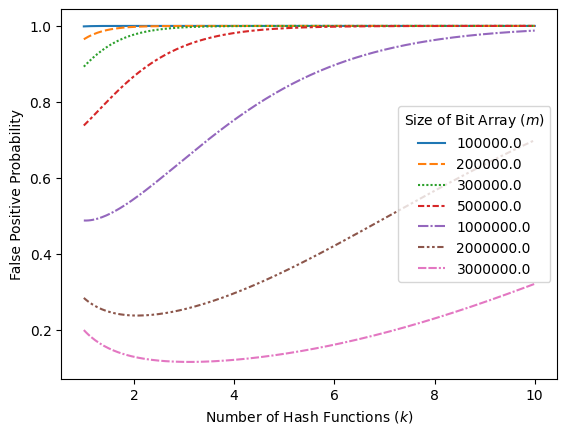

In [17]:
ax = sns.lineplot(df)
ax.set_ylabel("False Positive Probability")
ax.set_xlabel(r"Number of Hash Functions $(k)$")


In [18]:
fig = ax.get_figure()
fig.savefig("false_positive_probability.png")